<a href="https://colab.research.google.com/github/rameshKrSah/useful_functions/blob/main/Interactive_Manifold_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Name and properties of compounds in small clusters of manifold plots
2. Use clustering algorithm to find clusters
3. Plot molecules based on how large they are. Use features such as molecular weight, volume, number of atoms. What defines the size of molecules?

4. EDA - find class specific features
5. General toxicity vs. specific toxicity


In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
os.listdir('My Drive/Colab Notebooks/Others/')

['Interactive Manifold Learning.ipynb',
 'Master and Emissary MINIST',
 'Sensor Transformer for Human Activity Recognition',
 'MHEALTH Model Training and Evaluation.ipynb',
 'Paper - Manifold Learning.ipynb',
 'total_df.csv']

In [13]:
from sklearn import manifold
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
from collections import OrderedDict
from functools import partial

In [ ]:
import rdkit.Chem as Chem
from rdkit.Chem import AllChem

def smiles_to_fps(data, fp_length, fp_radius):
    return stringlist2intarray(np.array([smile_to_fp(s, fp_length, fp_radius) for s in data]))

def smile_to_fp(s, fp_length, fp_radius):
    m = Chem.MolFromSmiles(s)
    return (AllChem.GetMorganFingerprintAsBitVect(
        m, fp_radius, nBits=fp_length)).ToBitString()

def stringlist2intarray(A):
    '''This function will convert from a list of strings "10010101" into in integer numpy array.'''
    return np.array([list(s) for s in A], dtype=int)

In [10]:
# load the feature dataset
features_df = pd.read_csv("My Drive/Colab Notebooks/Others/total_df.csv", index_col=[0])

In [11]:
features_df.head()

,AWeight,PC1,PC2,PC3,PC4,PC5,PC6,Weight,naccr,naro,...,Smin8,Smin9,Hy,LogP,LogP2,MR,TPSA,UI,class_label,compound
0,13.557,42,63,87,113,143,169,542.268,15,0,...,-0.910,0.0,-2.794,-8.368,70.018,133.941,339.59,1.585,1,Dihydrostreptomycin
1,13.159,35,52,69,85,105,118,434.259,12,0,...,-0.062,0.0,-3.210,-3.327,11.072,119.931,199.73,0.000,1,Gentamicin
2,13.531,45,67,94,118,150,175,568.282,19,0,...,-0.646,0.0,-2.953,-8.895,79.126,138.356,353.11,0.000,1,Neomycin
3,14.267,38,49,46,47,48,49,556.405,10,12,...,-0.576,0.0,-3.117,0.616,0.379,146.760,267.40,4.248,1,Pentamidine isethionate
4,14.934,29,42,57,70,87,97,418.161,3,12,...,0.410,0.0,-3.949,1.735,3.010,107.083,35.53,3.807,1,Propantheline bromide


In [14]:
index = features_df.index
features_df = shuffle(features_df, random_state=43)
features_df.index = index

In [15]:
features_df.head()

,AWeight,PC1,PC2,PC3,PC4,PC5,PC6,Weight,naccr,naro,...,Smin8,Smin9,Hy,LogP,LogP2,MR,TPSA,UI,class_label,compound
0,12.618,27,45,64,98,130,163,290.217,4,0,...,0.680,0.0,-3.540,1.158,1.341,82.799,90.35,1.585,0,Saxagliptin
1,13.467,41,67,91,124,164,213,498.297,2,6,...,0.475,0.0,-3.801,6.576,43.245,124.022,58.20,3.322,0,Dutasteride
2,14.611,32,46,62,83,103,118,438.338,10,5,...,-0.790,0.0,-2.617,-0.545,0.297,106.533,184.51,3.700,0,Cefixime
3,13.936,29,42,56,71,87,105,376.269,11,10,...,0.277,0.0,-2.642,-3.257,10.607,96.281,185.46,3.585,0,S-adenosylmethionine
4,14.679,29,42,56,74,92,103,396.321,8,5,...,-0.408,0.0,-2.642,-0.048,0.002,97.498,162.92,3.585,0,Ceftibuten


In [16]:
feature_compound_name = features_df['compound'].values
class_label_name = ['Ototoxic' if y == 1.0 else 'Non-toxic' for y in features_df['class_label'].values]
Y_feature = features_df['class_label'].values
X_feature = features_df.drop(columns=['class_label', 'compound']).values

In [17]:
X_feature = StandardScaler().fit_transform(X_feature)

In [18]:
Y_feature.shape, X_feature.shape

((274,), (274, 402))

In [19]:
import plotly.express as px

In [20]:
def run_manifold(X, Y, name, n_components=2):
    # setup manifold methods
    methods = OrderedDict()
#     methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
    methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
#     methods['PCA'] = PCA(n_components=n_components)
    
    for i, (label, method) in enumerate(methods.items()):
        Y_ = method.fit_transform(X)
        if n_components == 2:
            fig = px.scatter(Y_, x=0, y=1, color=class_label_name, hover_name=feature_compound_name, 
                            title=f'Manifold method {label}', labels={'0': 'PC 1', '1': 'PC 2'})
        elif n_components == 3:
            fig = px.scatter_3d(Y_, x=0, y=1, z=2, color=class_label_name, hover_name=feature_compound_name, 
                        title=f'Manifold method {label}', labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
        fig.show()

In [21]:
run_manifold(X_feature, Y_feature, "PyBioMed Features", n_components=2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


### Clustering using the t-SNE components. 

Note that t-SNE components changes upon successive runs. 

In [22]:
sne_components = manifold.TSNE(n_components=2, init='pca', random_state=0).fit_transform(X_feature)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [24]:
# run clustering
n_clusters=20
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, random_state=0)
kmeans.fit(sne_components)

KMeans(n_clusters=20, random_state=0)

In [25]:
# we want to have same colors for the same clusters. 
# let's pair the cluster centers per closest one. 
kmeans_cluster_center = kmeans.cluster_centers_
kmeans_labels = pairwise_distances_argmin(sne_components, kmeans_cluster_center)

In [26]:
kmeans_labels_str = ["Cluster "+str(p) for p in kmeans_labels]

In [27]:
fig = px.scatter(sne_components, x=0, y=1, 
                 color=kmeans_labels_str, 
                 hover_name=[pp + " " + qq for pp, qq in zip(feature_compound_name, class_label_name)],
                            title=f'k-Means clustering of t-SNE components', labels={'0': 'PC 1', '1': 'PC 2'})
fig.show()

[]

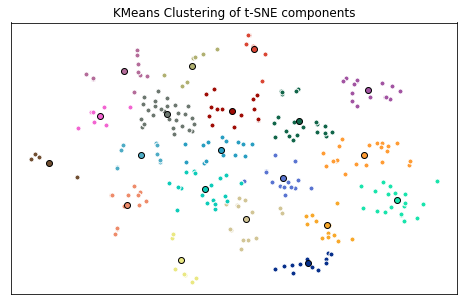

In [28]:
# plot the clusters
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
colors = ["#4EACC5", "#FF9C34", "#d2c596", "#a254a2", "#289ec1", "#18e4ac", "#072f8b", "#b46c9a", "#9f0c05", 
         "#5974d1", "#0dccb9", "#f264d1", "#b0b071", "#da4634", "#704e31", "#ee8b6a", "#eae883", "#116549", 
         "#f8a82a", "#6c776f"]


for k, col in zip(range(n_clusters), colors):
    my_members = kmeans_labels == k
    cluster_center = kmeans_cluster_center[k]
    ax.plot(sne_components[my_members, 0], sne_components[my_members, 1], "w", markerfacecolor=col, marker=".", markersize=10)
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans Clustering of t-SNE components")
ax.set_xticks(())
ax.set_yticks(())

Now, take the clusters and study what features the molecules in the clusters have in common. 

### What defines the size of the molecules?
Ototoxicity is caused by blocking of the MET-channel. Is there any correlation between the size of the molecules and the class labels. 

We will use the following features as proxy for molecular volume (or size) to do some analysis. 
1. Molecular weight (Weight)
2. Number of all atoms (nta)
3. Number of O atoms (noxy)
4. Number of C atoms (ncarb)
5. Number of single bonds (nsb)

We also have counts of various atoms such as
1. Hydrogen
2. Halogens
3. Heavy atoms
4. F atoms
5. Cl atoms
6. Br atoms
7. I atoms
8. C atoms
9. P atoms
10. S atoms
11. O atoms
12. N atoms


Other measures for molecular size are bond length, position of atoms, volume which can be computed from Molar mass and density. 

In [29]:
molecular_size_features = ['Weight', 'nta', 'noxy', 'ncarb', 'nsb']

In [30]:
for indicator in molecular_size_features:
    fig = px.scatter(
        features_df,
        y=indicator,
        x=np.arange(0, features_df.shape[0]),
        color = class_label_name,
        hover_name=features_df['compound'],
        title=f'Scatter plot of {indicator} feature as proxy for molecular size',
        width=700, 
        height=500
    )
    fig.show()